# DATA PREPERATION II
Data preperation involves step to tidy the data so that it can be processed. A dataset is said to be tidy if it satisfies the following conditions:
1.	observations are in rows
2.	variables are in columns
3.	contained in a single dataset.
Tidy data makes it easy to carry out data analysis.



## 1. Data Cleaning



There are various features of messy data that one can observe in practice. In this tutorial, we will see some of the common examples of messy data. 
Our first dataset is based on a survey done by Pew Research that examines the relationship between income and religious affiliation.

### 1.1 Data Reshaping

In [1]:
import pandas as pd
path="http://stat405.had.co.nz/data/pew.txt"
df1=pd.read_csv(path, delimiter='\t');
df1

,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k,$75-100k,$100-150k,>150k,Don't know/refused
0,Agnostic,27,34,60,81,76,137,122,109,84,96
1,Atheist,12,27,37,52,35,70,73,59,74,76
2,Buddhist,27,21,30,34,33,58,62,39,53,54
3,Catholic,418,617,732,670,638,1116,949,792,633,1489
4,Don’t know/refused,15,14,15,11,10,35,21,17,18,116
5,Evangelical Prot,575,869,1064,982,881,1486,949,723,414,1529
6,Hindu,1,9,7,9,11,34,47,48,54,37
7,Historically Black Prot,228,244,236,238,197,223,131,81,78,339
8,Jehovah's Witness,20,27,24,24,21,30,15,11,6,37
9,Jewish,19,19,25,25,30,95,69,87,151,162


#Clearly, this data is not tidy because “Column headers are values, not variable names”

it should look like: 

|religion 	|income |	frequency| 
|---|---|---|
|Agnostic |	<$10k 	| 27 | 
|---|---|---|



<div class="alert alert-block alert-info" style="margin-top: 20px">

Melt Method() <br>

</div>


In [2]:
#reshape DataFrame from wide format to long format
df1 = pd.melt(df1, id_vars='religion', var_name='income', value_name='frequency')
df1
#df1.set_index(['religion']).rename_axis(['income'],axis=1).stack()


,religion,income,frequency
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Don’t know/refused,<$10k,15
...,...,...,...
175,Orthodox,Don't know/refused,73
176,Other Christian,Don't know/refused,18
177,Other Faiths,Don't know/refused,71
178,Other World Religions,Don't know/refused,8


<div class="alert alert-block alert-info" style="margin-top: 20px">

Pivot Method() <br>

</div>


In [3]:
#pivot:: un-melting data
#opposite of melting i.e. turn unique values into separate columns
df1_pivot=df1.pivot(index='religion', columns='income', values='frequency')
print(df1_pivot)

income                   $10-20k  $100-150k  $20-30k  $30-40k  $40-50k  \
religion                                                                 
Agnostic                      34        109       60       81       76   
Atheist                       27         59       37       52       35   
Buddhist                      21         39       30       34       33   
Catholic                     617        792      732      670      638   
Don’t know/refused            14         17       15       11       10   
Evangelical Prot             869        723     1064      982      881   
Hindu                          9         48        7        9       11   
Historically Black Prot      244         81      236      238      197   
Jehovah's Witness             27         11       24       24       21   
Jewish                        19         87       25       25       30   
Mainline Prot                495        753      619      655      651   
Mormon                        40      


### 1.2 Checking Datatypes 



The next step in data preperation is checking and making sure that all data is of correct data type and is in the correct format .
In Pandas, we use:

.dtype() to check the data type

.astype() to change the data type

Let us understand it with a simple example.

**Note**: The main types stored in *pandas* objects are `float`, `int`, `bool`, `datetime64[ns]`, `datetime64[ns, tz]`, `timedelta[ns]`, `category`, and `object` (string). In addition, these dtypes have item sizes, e.g. `int64` and `int32`. Read more about them here: https://pbpython.com/pandas_dtypes.html




In [10]:
import pandas as pd
#create data
data = {
"A": [1, 9,8, 10 ],
"B" :["3 minutes","11 minutes" ,"88 minutes", "23 minutes"],
"C" :[2, 45,3, 1]
}
#create panda dataframe
df = pd.DataFrame(data)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   A       4 non-null      int64 
 1   B       4 non-null      object
 2   C       4 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 224.0+ bytes
None


As you can note column B is of object type even though logically storing integer values. 
To clean this data, we need to first remove "minutes".



In [11]:
#Strip minutes from B column values
df['B_trim']=df['B'].str.strip('minutes')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   A       4 non-null      int64 
 1   B       4 non-null      object
 2   C       4 non-null      int64 
 3   B_trim  4 non-null      object
dtypes: int64(2), object(2)
memory usage: 256.0+ bytes
None


You may notice inspite of removing minutes, still data type of B_trim column is not int. Let us convert the data type to int.
NOTE: we added B_trim as new column rather than changing current column

In [16]:
#contvert B_trim datatype to integer
df['B_newtype']=df['B_trim'].astype('int')

#check whether data type is changed or not

assert df['B_newtype'].dtype=='int'

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   A          4 non-null      int64 
 1   B          4 non-null      object
 2   C          4 non-null      int64 
 3   B_trim     4 non-null      object
 4   B_newtype  4 non-null      int32 
dtypes: int32(1), int64(2), object(2)
memory usage: 272.0+ bytes
None


Sometimes you may see a categorical column is treated as a number. In that case you want to change the type to categary.

In [17]:
#create a 2D list
data = {
"HouseNumber": [1, 9,8, 10 ],
"PostCode" :[7005,7008 ,7010, 7000],
"NumPersonliving" :[2, 10,3, 1]
}

#create panda dataframe
df = pd.DataFrame(data)
print(df['PostCode'].describe())


count       4.000000
mean     7005.750000
std         4.349329
min      7000.000000
25%      7003.750000
50%      7006.500000
75%      7008.500000
max      7010.000000
Name: PostCode, dtype: float64


As it can be observed, python is treating PostCode and HouseNumber columns as Numeric and giving summary statistics accordingly. Let us change the datatype to category


In [18]:
#using astype to change the datatype

df['PostCode']=df['PostCode'].astype("category")
df['HouseNumber']=df['HouseNumber'].astype("category")
print(df.info())
#printing summary statistics
print(df['PostCode'].describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   HouseNumber      4 non-null      category
 1   PostCode         4 non-null      category
 2   NumPersonliving  4 non-null      int64   
dtypes: category(2), int64(1)
memory usage: 576.0 bytes
None
count        4
unique       4
top       7000
freq         1
Name: PostCode, dtype: int64


### 1.3 Inconsistencies in Text or Categorical data

There can be multiple types of inconsistencies in your data, for example different names from same entity etc. In this section we will learn how to deal with them. Let us take an example.

In [19]:
#Consider data
import pandas as pd
#create data
country_name={'country':['India','Canada','canada','Mexico','United States','US', 'United States','US', 'canada','Mexico',]}
df = pd.DataFrame(country_name)

# get all the unique values in the 'country_name' column
country_uq = df['country'].unique()
# sort them to have a closer look
country_uq.sort()
country_uq

# There are multiple inconsisticies including capitalisation and multiple names. We will correct them one by one

#make everything either lower or capital case.
df['country']=df['country'].str.lower()

print(df['country'].unique())

#making names for same country consistent using replace function
df['country']=df['country'].replace({'us':'united states'})
print(df['country'].unique())



['india' 'canada' 'mexico' 'united states' 'us']
['india' 'canada' 'mexico' 'united states']


<div class="alert alert-block alert-info" style="margin-top: 20px">

Date Inconsistencies<br>

</div>

In [20]:
#inconsistencies in Dates
#read data with different date formats
import pandas as pd
df = pd.read_csv('dateformat.csv', nrows=10)
print(df)
#you will notice in data that dates in different rows has different format. 
#We will use pandas.to_datetime() method  to recognise date formats and have consistent format

df['corrGradeLastModified']=pd.to_datetime(df['GradeLastModified'])

df['corrLastSystemLogin']=pd.to_datetime(df['LastSystemLogin'])
df

df = pd.DataFrame(flight_data)
print(df)
df['schedule_dep_date']=pd.to_datetime()

         GradeLastModified       LastSystemLogin
0  2017-05-26T04:25:56.037  8/22/2017 7:33:06 PM
1  2017-06-23T06:46:34.327  8/16/2017 5:48:24 AM
2  2017-03-31T04:53:04.263       6/06/2017 15:29
3  2017-05-16T04:41:34.627       6/12/2017 12:27
4  2017-06-23T06:46:32.933        8/02/2017 7:43
5  2017-06-23T06:46:48.233       6/07/2017 11:07
6  2017-05-16T04:41:51.560        6/04/2017 7:39
7  2017-04-04T07:04:23.007       7/09/2017 15:23
8  2017-06-23T06:46:48.503  8/28/2017 9:43:48 AM
9  2017-05-30T03:08:22.607       8/09/2017 12:08


,GradeLastModified,LastSystemLogin,corrGradeLastModified,corrLastSystemLogin
0,2017-05-26T04:25:56.037,8/22/2017 7:33:06 PM,2017-05-26 04:25:56.037,2017-08-22 19:33:06
1,2017-06-23T06:46:34.327,8/16/2017 5:48:24 AM,2017-06-23 06:46:34.327,2017-08-16 05:48:24
2,2017-03-31T04:53:04.263,6/06/2017 15:29,2017-03-31 04:53:04.263,2017-06-06 15:29:00
3,2017-05-16T04:41:34.627,6/12/2017 12:27,2017-05-16 04:41:34.627,2017-06-12 12:27:00
4,2017-06-23T06:46:32.933,8/02/2017 7:43,2017-06-23 06:46:32.933,2017-08-02 07:43:00
5,2017-06-23T06:46:48.233,6/07/2017 11:07,2017-06-23 06:46:48.233,2017-06-07 11:07:00
6,2017-05-16T04:41:51.560,6/04/2017 7:39,2017-05-16 04:41:51.560,2017-06-04 07:39:00
7,2017-04-04T07:04:23.007,7/09/2017 15:23,2017-04-04 07:04:23.007,2017-07-09 15:23:00
8,2017-06-23T06:46:48.503,8/28/2017 9:43:48 AM,2017-06-23 06:46:48.503,2017-08-28 09:43:48
9,2017-05-30T03:08:22.607,8/09/2017 12:08,2017-05-30 03:08:22.607,2017-08-09 12:08:00


### 1.4 Dealing with Noisy data



Let us learn first the basic functions in panda to deal with noisy data. 

Drop values using filtering: movies = movies[movies['avg_rating'] <= 5]

Drop values using: .drop(): movies.drop(movies[movies['avg_rating'] > 5].index, inplace = True)

Assert results: assert movies['avg_rating'].max() <= 5

In [21]:
import pandas as pd
#create data
data = {
"A": [1, 9,8, 10 ],
"B" :["3 minutes","11 minutes" ,"88 minutes", "23 minutes"],
"C" :[2, 45,3, 1]
}

#create panda dataframe
df = pd.DataFrame(data)



#### Correcting Inconsistent Values

Let us assume for C column only values less than 5 are allowed, there are two ways to deal with it, we can drop values by filtering with maximum allowed value.

In [24]:
#drop the inconsistent data
df_drop=df[df["C"]<=5]
print(df_drop)

# replace by a constant value by filtering using loc method
df.loc[df["C"]>5, "C"]=5
print(df)

#let us check whether there are rows which do not satisfy the condition. 
#If condition is not satisfied, we will get assertion error
assert df["C"].max()<=5, "Values that are more than 5"


    A           B  C
0   1   3 minutes  2
1   9  11 minutes  5
2   8  88 minutes  3
3  10  23 minutes  1
    A           B  C
0   1   3 minutes  2
1   9  11 minutes  5
2   8  88 minutes  3
3  10  23 minutes  1


#### Data Smoothing using Binning
Let us assume for C column only values less than 5 are allowed, there are two ways to deal with it, we can drop values by filtering with maximum allowed value
#Another way of dealing with Noisy Data is binning

'cut()' function in pandas can help in that.




In [25]:
# Read and print data
import seaborn as sns
import pandas as pd
import numpy as np

newdf=pd.read_csv('engagement.csv')
newdf.rename(columns={'Unnamed: 0':'StudentNum'},inplace=True)
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   StudentNum                 96 non-null     int64 
 1   CourseOfferingCode         96 non-null     object
 2   ContentCompleted           96 non-null     int64 
 3   ContentRequired            96 non-null     int64 
 4   TimeInContent              96 non-null     int64 
 5   NumberOfLoginsToTheSystem  96 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 4.6+ KB


<div class="alert alert-block alert-info" style="margin-top: 20px">

Using Your Bin Values<br>

</div>

In [27]:
#creating student groups and bins
student_group=['Not Engaged', 'Engaged', 'Very Engaged']
binsrange=[0,4,6,8]
#assigning rows to bins based on values
newdf['Engagement']=pd.cut(newdf['ContentCompleted'], bins=binsrange,labels=student_group)
#check top rows of the dataframe
print(newdf[['ContentCompleted','Engagement']].head())
print(newdf['Engagement'].describe())


   ContentCompleted    Engagement
0                 5       Engaged
1                 7  Very Engaged
2                 4   Not Engaged
3                 8  Very Engaged
4                 4   Not Engaged
count          96
unique          3
top       Engaged
freq           42
Name: Engagement, dtype: object


<AxesSubplot:xlabel='Engagement', ylabel='Count'>

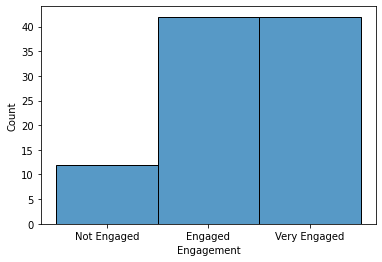

In [28]:
#plot the bins
#sns.catplot(x = "Engagement", y = "ContentCompleted",data=df_edu1[['ContentCompleted','Engagement']])
sns.histplot(newdf,x='Engagement')

<div class="alert alert-block alert-info" style="margin-top: 20px">

Using Bin Values by default cut function<br>

</div>

count          96
unique          3
top       Engaged
freq           42
Name: Engagement, dtype: object


<AxesSubplot:xlabel='Engagement', ylabel='Count'>

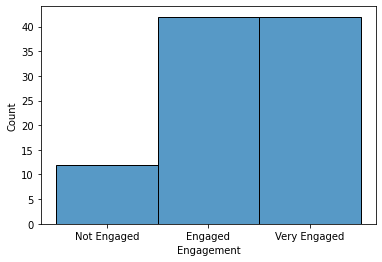

In [29]:

newdf['Engagement']=pd.cut(newdf['ContentCompleted'], 3,labels=student_group)
#df_edu1=df[df['CourseOfferingCode']=='AW_EDU_13S2_2975']
newdf[['ContentCompleted','Engagement']]
print(newdf['Engagement'].describe())
#sns.catplot(x = "Engagement", y = "ContentCompleted",data=df_edu1[['ContentCompleted','Engagement']])
sns.histplot(newdf,x='Engagement')

## 3. Data Transformation


### 3.1 Normalisation
Many data analysis algorithms needs to calculate distances between points which might have multiple dimentions(features). To be able calculate distances properly, we needs to have each feature normalised. One can either manupulate the dataframe using basic python functionality or use a library. Here, we will show using Sklearn library to assist in normalisation.


In [30]:

import pandas as pd
import numpy as np

#create Data
data = {
"A": [1, 9,8, 10 ],
"B" :["3 minutes","11 minutes" ,"88 minutes", "23 minutes"],
"C" :[2, 45,3, 1]
}

#create panda dataframe
df = pd.DataFrame(data)

df_ctime=df['C']

from sklearn.preprocessing import StandardScaler
# Create the standard Scaler object
scaler = StandardScaler()
scaler = scaler.fit(df.C.values.reshape(-1,1))

df['Zscore']=scaler.transform(df.C.values.reshape(-1,1))
df
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(df.C.values.reshape(-1,1))
print(scaler.data_max_)
df['minmax']=scaler.transform(df.C.values.reshape(-1,1))
df

[45.]


,A,B,C,Zscore,minmax
0,1,3 minutes,2,-0.576934,0.022727
1,9,11 minutes,45,1.730803,1.000000
2,8,88 minutes,3,-0.523266,0.045455
3,10,23 minutes,1,-0.630603,0.000000


### 3.2 Encoding of Categorical Data
As most machine learning algorithms work on numbers, we need to transform categorical data into numbers.


In [31]:
import pandas as pd
import numpy as np

#create Data
data = {
"housenum": [1, 9,8, 10 ],
"postcode" :["7005","7000" ,"7006", "7010"],
"lettervolume" :["high", "low","medium", "very high"]
}

#create panda dataframe
df = pd.DataFrame(data)
print(df)


df_cat=df[["postcode","lettervolume"]]
#check if there are nulls
df_cat.isnull().sum()

df_cat.info()

#create mapping
map_lettervolume={"very high":3,
                "high":2,
                 "medium":1,
                 "low":0,
                 }
df_cat['encode']=df_cat.lettervolume.map(map_lettervolume)
df_cat

   housenum postcode lettervolume
0         1     7005         high
1         9     7000          low
2         8     7006       medium
3        10     7010    very high
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   postcode      4 non-null      object
 1   lettervolume  4 non-null      object
dtypes: object(2)
memory usage: 192.0+ bytes


,postcode,lettervolume,encode
0,7005,high,2
1,7000,low,0
2,7006,medium,1
3,7010,very high,3


## 4. Data Integration

Two ways, you may want to combine the data:

<li>Same data split into multiple files. You will achieve integration of them using concat() method. Read more about the method here: https://pandas.pydata.org/docs/reference/api/pandas.concat.html</li>

<li>Merging data from different files based on a common column. You will achieve such integration using Merge() method. Read more about the method here:
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html </li>



<div class="alert alert-block alert-info" style="margin-top: 20px">

Concat() Function<br>

</div>

In [35]:
import pandas as pd
#let us construct two dummy dataframes
df1 = pd.DataFrame({'EmpName': ['Rama', 'Bob', 'Dave', 'Krishna'],
                    'group': ['Academic', 'SchoolAdmin', 'CollegeAdmin', 'HR']})
df2 = pd.DataFrame({'EmpName': ['Mary', 'Bilal', 'David', 'Garg'],
                    'group': ['Academic', 'SchoolAdmin', 'CollegeAdmin', 'HR']})

df_comb=pd.concat([df1,df2])

#index of orginal dataframes are preserved..so it is not completely combined
df_comb

,EmpName,group
0,Rama,Academic
1,Bob,SchoolAdmin
2,Dave,CollegeAdmin
3,Krishna,HR
0,Mary,Academic
1,Bilal,SchoolAdmin
2,David,CollegeAdmin
3,Garg,HR


In [34]:
#to have one index you need do following

df_comb=pd.concat([df1,df2], ignore_index=True)
print(df_comb)

   EmpName         group
0     Rama      Academic
1      Bob   SchoolAdmin
2     Dave  CollegeAdmin
3  Krishna            HR
4     Mary      Academic
5    Bilal   SchoolAdmin
6    David  CollegeAdmin
7     Garg            HR


<div class="alert alert-block alert-info" style="margin-top: 20px">

Merge() Function<br>

</div>

In [36]:
#let us construct two dummy dataframes for understanding how merge works

d1 = {'Id': ['11', '12', '13', '14','15'],
 'Name':['Viv', 'Rahu', 'Gaura', 'Ann','Vishakha'], 
 'Age':[27, 24, 22, 32, 28],} 
 
 
d2 = {'Id': ['11', '12', '13', '14'],
 'Address':['Hobart', 'Kingston', 'Sandybay', 'NewTown'], 
 'Qualification':['BICT', 'MBB', 'Bcom', 'B.hons']}
             
df1=pd.DataFrame(d1)
df2=pd.DataFrame(d2)
df2

,Id,Address,Qualification
0,11,Hobart,BICT
1,12,Kingston,MBB
2,13,Sandybay,Bcom
3,14,NewTown,B.hons


In [37]:
#inner join  : default
merged_df=pd.merge(left=df1, right=df2, left_on='Id', right_on='Id' )
print(merged_df)


   Id   Name  Age   Address Qualification
0  11    Viv   27    Hobart          BICT
1  12   Rahu   24  Kingston           MBB
2  13  Gaura   22  Sandybay          Bcom
3  14    Ann   32   NewTown        B.hons


In [38]:
#left join

merged_df=pd.merge(left=df1, right=df2, left_on='Id', right_on='Id', how='left' )
print(merged_df)

   Id      Name  Age   Address Qualification
0  11       Viv   27    Hobart          BICT
1  12      Rahu   24  Kingston           MBB
2  13     Gaura   22  Sandybay          Bcom
3  14       Ann   32   NewTown        B.hons
4  15  Vishakha   28       NaN           NaN


In [39]:
#right join
merged_df=pd.merge(left=df1, right=df2, left_on='Id', right_on='Id', how='right' )
print(merged_df)


   Id   Name  Age   Address Qualification
0  11    Viv   27    Hobart          BICT
1  12   Rahu   24  Kingston           MBB
2  13  Gaura   22  Sandybay          Bcom
3  14    Ann   32   NewTown        B.hons


In [40]:
#outer join
merged_df=pd.merge(left=df1, right=df2, left_on='Id', right_on='Id', how='outer' )
print(merged_df)

   Id      Name  Age   Address Qualification
0  11       Viv   27    Hobart          BICT
1  12      Rahu   24  Kingston           MBB
2  13     Gaura   22  Sandybay          Bcom
3  14       Ann   32   NewTown        B.hons
4  15  Vishakha   28       NaN           NaN
